In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


Primero, declaramos los valores iniciales y recogemos los datos

The centroids are: 
 [[4.69       3.085      1.385      0.19      ]
 [6.         2.5        4.12857143 1.21428571]
 [5.32727273 2.45454545 3.59090909 1.11818182]
 [7.475      3.125      6.3        2.05      ]
 [5.07894737 3.5        1.55263158 0.29473684]
 [5.49       3.92       1.46       0.26      ]
 [5.56666667 2.81666667 4.28333333 1.36666667]
 [6.45       3.01666667 4.60555556 1.43888889]
 [6.02777778 2.73333333 5.02777778 1.79444444]
 [6.56818182 3.08636364 5.53636364 2.16363636]]

The SSE is: 12808.054305062547


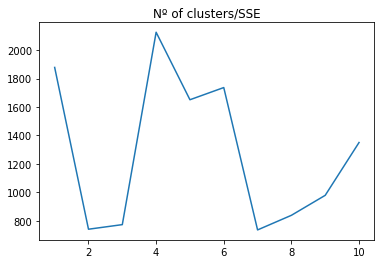

In [25]:
fichero = "iris.csv"
amount_centroides = 10
seed = 15

np.random.seed(seed)
atributes, classes = readData(fichero)
kmeans, distances, centros = clustering(atributes, amount_centroides)
SSE = calculateSSE(distances)

print("The centroids are: \n", centros)
print("\nThe SSE is:", sum(SSE))

plt.title('Nº of clusters/SSE')
plt.plot(range(1, centros.shape[0]+1), SSE[:])

In [3]:
def clustering(atributes, amount_centroides):
    centroides = atributes[np.random.choice(atributes.shape[0], amount_centroides, replace=False)]
    kmeans = KMeans(n_clusters = amount_centroides, init = centroides, max_iter = 500, n_init = 1, random_state = 0)
    distances = kmeans.fit_transform(atributes)
    centros = kmeans.cluster_centers_

    return kmeans, distances, centros

In [4]:
def readData(fichero):
    data = pd.read_csv(fichero, header=None)
    atributes = data.values[1:, 0:-1]
    classes = data.values[1:, -1]

    return atributes, classes

In [5]:
def calculateSSE(distances):
    SSE = 0
    for i in range(distances.shape[0]):
        SSE += pow(distances[i], 2)

    return SSE

Una vez declaradas todas las funciones, las ejecutaremos para realizar nuestra clasificación